In [ ]:
#brown corpus
import nltk
from nltk.corpus import brown
print brown.categories()
print brown.sents(categories='news')

In [ ]:
cfd = nltk.ConditionalFreqDist( (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor'] 
modals = ['can', 'could', 'may', 'might', 'must', 'will'] 
cfd.tabulate(conditions=genres, samples=modals)

In [ ]:
#loading own corpus
from nltk.corpus import PlaintextCorpusReader
corpus_root = path_file
wordLists = PlaintextCorpusReader(corpus_root, '.*')
wordLists.words(wordLists.fileids()[0])

In [ ]:
#bigrams
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

In [ ]:
#proportion of non-stopping words
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return 1.0 * len(content) / len(text)

content_fraction(nltk.corpus.reuters.words())

In [ ]:
#pronoucing dictionary
entries = nltk.corpus.cmudict.entries()
for entry in entries[39943:39951]:
    print entry

In [ ]:
#find words with similar pronounciation
for word, pron in entries:
    if len(pron) == 3:
        p1, p2, p3 = pron
        if p1 == 'P' and p3 == 'T':
            print word

In [ ]:
from nltk.corpus import toolbox
#toolbox.entries('rotokas.dic')

In [ ]:
#wordnet synonyms
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

In [ ]:
wn.synset('car.n.01').lemma_names()

In [ ]:
#look at concepts that're more specific
wn.synset('car.n.01').hyponyms()[:5]

In [ ]:
#look at concepts that're more general
wn.synset('car.n.01').hypernym_paths()[0]

In [ ]:
#the `include` relationship
wn.synset('tree.n.01').part_meronyms()

In [ ]:
#semantic similarity of two words
right = wn.synset('right_whale.n.01') 
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')

In [ ]:
#higher min_depth, more similar
right.lowest_common_hypernyms(minke)[0].min_depth()

# Processing Raw Text

In [ ]:
#tokenizing
from urllib import urlopen
url = "http://www.gutenberg.org/files/2554/2554.txt"
raw = urlopen(url).read()

tokens = nltk.word_tokenize(raw)
tokens[:10]

In [ ]:
#tokens to nltk text
text = nltk.Text(tokens)
text.vocab()

In [ ]:
#words commonly appear together
text.collocations()

In [ ]:
#sentence segmentation
sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
text = nltk.corpus.gutenberg.raw('some_file')
sens = sent_tokenizer(text)

### POS Tagging

In [ ]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")

In [ ]:
nltk.pos_tag(text)

> The text.similar() method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2.

In [ ]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [ ]:
text.similar("woman")

In [ ]:
#tagged corpus
nltk.corpus.brown.tagged_words()

In [ ]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories="news")

In [ ]:
#what POS happen before a noun
word_tag_pairs = nltk.bigrams(brown_news_tagged)
list(nltk.FreqDist(a[1] for (a, b) in word_tag_pairs if b[1].startswith('N')))

## Automatic tagging

In [ ]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories="news")

In [ ]:
#regular expression tagger
patterns = [
     (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*es$', 'VBZ'),
    (r'.*ould$', 'MD'),
    (r'.*\'s$', 'NN$'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
    (r'.*', 'NN') ]

In [ ]:
#first one that matches is applied
regex_tagger = nltk.RegexpTagger(patterns)
regex_tagger.tag(brown.sents(categories='news')[3])

In [ ]:
#look up tagger
#use the most frequent words and their most frequent tag
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.keys()[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)

sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

In [ ]:
#using backoff
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                         backoff=nltk.DefaultTagger('NN'))

In [ ]:
baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

In [ ]:
#uni-grame tagger
#same as look up
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.evaluate(brown_tagged_sents)

In [ ]:
#n-gram tagger
bigram_tagger = nltk.BigramTagger(brown_tagged_sents)
bigram_tagger.evaluate(brown_tagged_sents)

> N-gram taggers should not consider context that crosses a sentence boundary. Accordingly, NLTK taggers are designed to work with lists of sentences, where each sentence is a list of words. At the start of a sentence, tn-1 and preceding tags are set to None

## Combine Taggers   

1. Try tagging the token with the bigram tagger.
2. If the bigram tagger is unable to find a tag for the token, try the unigram tagger. 
3. If the unigram tagger is also unable to find a tag, use a default tagger.


In [ ]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(brown_tagged_sents, backoff=t0)
#cut off specify the pattern has to appear over 2 times to be used
t2 = nltk.BigramTagger(brown_tagged_sents, cutoff=2, backoff=t1)

t2.evaluate(brown_tagged_sents)

### Tagging unknow words  
> replacing unknownn words with UNK, so that the n-gram can learn the pattern

### Brill Tagging
> The general idea is very simple: guess the tag of each word, then go back and fix the mistakes. In this way, a Brill tagger successively transforms a bad tagging of a text into a better one. As with n-gram tagging, this is a supervised learning method, since we need an- notated training data to figure out whether the tagger’s guess is a mistake or not. How- ever, unlike n-gram tagging, it does not count observations but compiles a list of trans- formational correction rules.

#### Let’s look at an example in- volving the following sentence:
__The President said he will ask Congress to increase grants to states for voca- tional rehabilitation.__
> We will examine the operation of two rules: (a) replace NN with VB when the previous word is TO; (b) replace TO with IN when the next tag is NNS. Table 5-6 illustrates this process, first tagging with the unigram tagger, then applying the rules to fix the errors.

![Img](./image/Brill.png)

In [ ]:
import nltk.tag.brill as brill

"Source code"

# Classifying Text

In [2]:
import pandas as pd
import numpy as np

#sentence segmentation
sents = nltk.corpus.treebank_raw.sents()

boundary = np.array([len(x) for x in sents])-1

boundary = np.cumsum(boundary)

sents = [x for y in sents for x in y]

NameError: name 'nltk' is not defined

In [ ]:
#build up feature set
features = []
for i in range(1, len(sents)-1):
    if sents[i] not in '.?!':
        continue
    next_word_cap = sents[i+1][0].isupper()
    prevword = sents[i-1].lower()
    prev_word_one_char = len(sents[i-1]) == 1
    is_bountry = i in sents
    features.append((next_word_cap, prevword, prev_word_one_char, is_bountry))

#then run some classification like naive bayes

# Extracting information

![information retrieval](./image/info_retrieval.png)

In [3]:
import nltk, re, pprint

def ie_process(document):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    

## Noun Phrase Chunking

> In this case, we will define a simple grammar with a single regular expression rule . This rule says that an NP chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN). Using this grammar, we create a chunk parser , and test it on our example sentence . The result is a tree, which we can either print , or display graphically .

In [4]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
grammar  = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result  = cp.parse(sentence)
print type(result)
print result

<class 'nltk.tree.Tree'>
(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [7]:
grammar = r"""
NP: {<DT|PP\$>?<JJ>*<NN>} # chunk determiner/possessive, adjectives and nouns
{<NNP>+} # chunk sequences of proper nouns """
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"),
("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]

#### IOB tags
> In this scheme, each token is tagged with one of three special chunk tags, I (inside), O (outside), or B (begin). A token is tagged as B if it marks the beginning of a chunk. Subsequent tokens within the chunk are tagged I. All other tokens are tagged O.

![iob](./image/IOB.png)

### Developing and Evaluating Chunkers

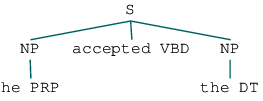

In [22]:
#reading IOB format and converting to nltk tree
text = '''
he PRP B-NP
accepted VBD B-VP
the DT B-NP
'''

nltk.chunk.conllstr2tree(text, chunk_types=['NP'])
#if come across Lookup Error; Install ghostdriver with:
#brew install ghostdriver

In [14]:
#CoNLL-2000 chunking corpus
from nltk.corpus import conll2000
print conll2000.chunked_sents('train.txt')[99]

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


In [24]:
#baseline: no chunks
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
len(test_sents)

2012

In [26]:
print cp.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  43.4%
    Precision:      0.0%
    Recall:         0.0%
    F-Measure:      0.0%


In [28]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print cp.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  87.7%
    Precision:     70.6%
    Recall:        67.8%
    F-Measure:     69.2%


In [40]:
#using unigram tagger to build chunker
#from POS-tag to chunk
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data)
        
    def parse(self, sentence):
        pos_tags = [pos for (word, pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                in zip(sentence, chunktags)]
        #note all the tags is in list of tags, so use colltags2tree not collstr2tree
        return nltk.chunk.conlltags2tree(conlltags)

In [41]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print unigram_chunker.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  92.9%
    Precision:     79.9%
    Recall:        86.8%
    F-Measure:     83.2%


In [42]:
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] for sent in train_sents]
        self.tagger = nltk.BigramTagger(train_data)
        
    def parse(self, sentence):
        pos_tags = [pos for (word, pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                in zip(sentence, chunktags)]
        #note all the tags is in list of tags, so use colltags2tree not collstr2tree
        return nltk.chunk.conlltags2tree(conlltags)

In [44]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
bigram_chunker = BigramChunker(train_sents)
print bigram_chunker.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  93.3%
    Precision:     82.3%
    Recall:        86.8%
    F-Measure:     84.5%


### Training Classifier-Based Chunkers
a. Joey/NN sold/VBD the/DT farmer/NN rice/NN ./.
b. Nick/NN broke/VBD my/DT computer/NN monitor/NN ./.

> These two sentences have the same part-of-speech tags, yet they are chunked differ- ently. In the first sentence, the farmer and rice are separate chunks, while the corre- sponding material in the second sentence, the computer monitor, is a single chunk. Clearly, we need to make use of information about the content of the words, in addition to just their part-of-speech tags, if we wish to maximize chunking performance.

In [45]:
class ConsecutiveNpChunkTagger(nltk.TaggerI):
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history)
                train_set.append((featureset, tag))
                history.append(tag)
            self.classifier = nltk.MaxentClassifier.train(train_set, algorithm='megam', trace=0)
            
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classifier(featureset)
            history.append(tag)
        return zip(sentence, history)
    

class ConsecutiveNpChunk(nltk.ChunkParserI):
    def __init__(self, train_sents):
        tagged_sents = 

In [1]:
#traning classifier_based chunkers

#simple feature extraction:
#  just provide the POS tag of the current token (like unigram)
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    return {"pos":pos}


#add previous POS tag:
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prevword, prevpos = "<START>", "<START>"
    else:
        prevword, prevpos = sentence[i-1]
    return {"pos":pos, "prevpos":prevpos}


#also adding the current word
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prevword, prevpos = "<START>", "<START>"
    else:
        prevword, prevpos = sentence[i-1]
    return {"pos":pos, "prevpos":prevpos, "word":word}

#we can also adding other features like next POS, (previous POS, current POS)
#detail on Page 277


import nltk
class ConsecutiveNPChunkTagger(nltk.TaggerI):
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history)
                train_set.append((featureset, tag))
                history.append(tag)
            self.classifier = nltk.MaxentClassifier.train(train_set, algorithm=='megam', trace=0)
        
        def tag(self, sentences):
            history = []
            for i, word in enumerate(sentences):
                featureset = npchunk_features(sentence, i, history)
                tag = self.classifier.classify(featureset)
                history.append(tag)
            return zip(sentence, history)
    
class ConsecutiveNPChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        tagged_sents = [[((w,t),c) for (w,t,c) in nltk.chunk.tree2conlltags(sent)]
                for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents)
        
    def parser(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w, t, c) for ((w, t), c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

SyntaxError: invalid syntax (<ipython-input-1-3958a4b82b3d>, line 2)

## Recursion in Linguistic Structure
### Building Nested Structure with Cascaded Chunkers

In [11]:
#one rule per line in the grammar
grammar = r"""
NP: {<DT|JJ|NN.*>+}
PP: {<IN><NP>}
VP: {<VB.*><NP|PP|CLAUSE>+$}
CLAUSE: {<NP><VP>}
"""
cp = nltk.RegexpParser(grammar)
sentence = [("John", "NNP"), ("thinks", "VBZ"), ("Mary", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN"), ("sit", "VB"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]
print cp.parse(sentence)

(S
  (NP John/NNP)
  thinks/VBZ
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


> Unfortunately this result misses the VP headed by saw. 
> The solution to these problems is to get the chunker to loop over its patterns: after trying all of them, it repeats the process. We add an optional second argument loop to specify the number of times the set of patterns should be run:

In [13]:
cp = nltk.RegexpParser(grammar, loop=2)
print cp.parse(sentence)

(S
  (NP John/NNP)
  thinks/VBZ
  (CLAUSE
    (NP Mary/NN)
    (VP
      saw/VBD
      (CLAUSE
        (NP the/DT cat/NN)
        (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))))


### Trees
![Tree](./image/Tree.png)

In [14]:
#in nltk, tree is created by giving a node label and a list of children
tree1 = nltk.Tree('NP', ['Alice'])
print tree1

(NP Alice)


In [16]:
tree2 = nltk.Tree('NP', ['the', 'rabbit'])
print tree2

(NP the rabbit)


In [17]:
#combining trees
tree3 = nltk.Tree('VP', ['chased', tree2])
tree4 = nltk.Tree('S', [tree1, tree3])
print tree4

(S (NP Alice) (VP chased (NP the rabbit)))


In [28]:
#Tree Traversal
def traverse(t):
    try:
        t.label()
    except AttributeError:
        print t,
    else:
        print '(', t.label(),
        for child in t:
            traverse(child)
        print ')', #prevent newline
traverse(tree4)

( S ( NP Alice ) ( VP chased ( NP the rabbit ) ) )


## Named Entity Recognition

> Named entity recognition is a task that is well suited to the type of classifier-based approach that we saw for noun phrase chunking. In particular, we can build a tagger that labels each word in a sentence using the IOB format, where chunks are labeled by their appropriate type. Here is part of the CONLL 2002 (conll2002) Dutch training data:

Eddy N B-PER  
Bonte N I-PER  
is V O   
woordvoerder N O   
van Prep O  
diezelfde Pron O   
Hogeschool N B-ORG   
. Punc O  
> In this representation, there is one token per line, each with its part-of-speech tag and its named entity tag. Based on this training corpus, we can construct a tagger that can be used to label new sentences, and use the nltk.chunk.conlltags2tree() function to convert the tag sequences into a chunk tree.

> NLTK provides a classifier that has already been trained to recognize named entities, accessed with the function nltk.ne_chunk(). If we set the parameter binary=True , then named entities are just tagged as NE; otherwise, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

In [11]:
import nltk
sent = nltk.corpus.treebank.tagged_sents()[22]
print ' '.join(nltk.tag.untag(sent))
print sent

The U.S. is one of the few industrialized nations that *T*-7 does n't have a higher standard of regulation for the smooth , needle-like fibers such as crocidolite that *T*-1 are classified *-5 as amphobiles , according to Brooke T. Mossman , a professor of pathlogy at the University of Vermont College of Medicine .
[(u'The', u'DT'), (u'U.S.', u'NNP'), (u'is', u'VBZ'), (u'one', u'CD'), (u'of', u'IN'), (u'the', u'DT'), (u'few', u'JJ'), (u'industrialized', u'VBN'), (u'nations', u'NNS'), (u'that', u'WDT'), (u'*T*-7', u'-NONE-'), (u'does', u'VBZ'), (u"n't", u'RB'), (u'have', u'VB'), (u'a', u'DT'), (u'higher', u'JJR'), (u'standard', u'NN'), (u'of', u'IN'), (u'regulation', u'NN'), (u'for', u'IN'), (u'the', u'DT'), (u'smooth', u'JJ'), (u',', u','), (u'needle-like', u'JJ'), (u'fibers', u'NNS'), (u'such', u'JJ'), (u'as', u'IN'), (u'crocidolite', u'NN'), (u'that', u'WDT'), (u'*T*-1', u'-NONE-'), (u'are', u'VBP'), (u'classified', u'VBN'), (u'*-5', u'-NONE-'), (u'as', u'IN'), (u'amphobiles', u'NNS'

In [6]:
print nltk.ne_chunk(sent, binary=True)

(S
  The/DT
  (NE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (NE Brooke/NNP)
  T./NNP
  Mossman/NNP
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (NE University/NNP)
  of/IN
  (NE Vermont/NNP College/NNP)
  of/IN
  (NE Medicine/NNP)
  ./.)


In [7]:
#not very accurate, `the university of vermont` is not recorgnized correctly

## Relation Extraction

> Once named entities have been identified in a text, we then want to extract the relations that exist between them. As indicated earlier, we will typically be looking for relations between specified types of named entity. One way of approaching this task is to initially look for all triples of the form (X, α, Y), where X and Y are named entities of the required types, and α is the string of words that intervenes between X and Y. We can then use regular expressions to pull out just those instances of α that express the relation that we are looking for. The following example searches for strings that contain the word in. The special regular expression (?!\b.+ing\b) is a negative lookahead assertion that allows us to disregard strings such as success in supervising the transition of, where in is followed by a gerund.

In [9]:
import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, corpus='ieer', pattern=IN):
        print nltk.sem.rtuple(rel)

[ORG: u'WHYY'] u'in' [LOC: u'Philadelphia']
[ORG: u'McGlashan &AMP; Sarrail'] u'firm in' [LOC: u'San Mateo']
[ORG: u'Freedom Forum'] u'in' [LOC: u'Arlington']
[ORG: u'Brookings Institution'] u', the research group in' [LOC: u'Washington']
[ORG: u'Idealab'] u', a self-described business incubator based in' [LOC: u'Los Angeles']
[ORG: u'Open Text'] u', based in' [LOC: u'Waterloo']
[ORG: u'WGBH'] u'in' [LOC: u'Boston']
[ORG: u'Bastille Opera'] u'in' [LOC: u'Paris']
[ORG: u'Omnicom'] u'in' [LOC: u'New York']
[ORG: u'DDB Needham'] u'in' [LOC: u'New York']
[ORG: u'Kaplan Thaler Group'] u'in' [LOC: u'New York']
[ORG: u'BBDO South'] u'in' [LOC: u'Atlanta']
[ORG: u'Georgia-Pacific'] u'in' [LOC: u'Atlanta']


# Analyzing sentence structure

> we will adopt the formal framework of “generative grammar,” in which a “language” is considered to be nothing more than an enormous collection of all grammatical sentences, and a grammar is a formal notation that can be used for “gen- erating” the members of this set. Grammars use recursive productions of the form S → S and S, as we will explore in Section 8.3. In Chapter 10 we will extend this, to automatically build up the meaning of a sentence out of the meanings of its parts.

In [17]:
#context free grammar
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
trees = parser.parse(sent)
for tree in trees:
    print tree

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [ ]:
#we can generate small sentence with n-gram model
#but they'll look wired because they're not following the grammar

**coordinate structure**:if v1 and v2 are both phrases of grammatical category X, then __v1 and v2__ is also a phrase of category X.

Here are a couple of examples. In the first, two NPs (noun phrases) have been conjoined to make an NP, while in the second, two APs (adjective phrases) have been conjoined to make an AP

a. The book’s ending was (NP the worst part and the best part) for me. 
b. On land they are (AP slow and clumsy looking).

**constituent structure**:words combine with other words to form units. The evidence that a sequence of words forms such a unit is given by substitutability—that is, a sequence of words in a well-formed sentence can be replaced by a shorter sequence without rendering the sentence ill-formed.

a. The little bear saw the fine fat trout in the brook.  

The fact that we can substitute He for The little bear indicates that the latter sequence is a unit. By contrast, we cannot replace little bear saw in the same way.   

![](./image/consti.png)

![](./image/syn_cat.png)

## Simple Context Free Grammar

In [18]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [19]:
sent = "Mary saw Bob".split()
parser = nltk.RecursiveDescentParser(grammar1)
for tree in parser.parse(sent):
    print tree

(S (NP Mary) (VP (V saw) (NP Bob)))


## Parsing with CFG


In [ ]:
http://www.nltk.org/book/ch08.html